In [8]:
import json, os, re
from metadata_metrics import readability_score, completeness_score_img, completeness_score_jsonxml, completeness_score_keyword, completeness_score_netcdf, completeness_score_tabular
import numpy as np
import matplotlib.pyplot as plt

In [16]:
with open("dequeue_list.json", "r") as fp:
	dequeue_list = json.load(fp)
with open("EstimateTime/file_to_index.json", "r") as fp:
	file_to_index_dict = json.load(fp)
file_to_index_dict = dict(zip(file_to_index_dict.values(), file_to_index_dict.keys()))

In [11]:

def get_metadata_metrics(dequeue_list, file_to_index_dict):
	readability_scores = dict()
	completeness_scores = dict()
	count = 0
	for key, value in dequeue_list.items():
		parsed_key = key.split("/")
		filename = parsed_key[len(parsed_key) - 1]
		if value == 1: # keyword
			filepath = '/home/cc/CDIACMetadataExtract/CDIACKeywordExtract/' + filename + 'KWXtract' + file_to_index_dict[key] + '.json'
			completeness_scores[key] = completeness_score_keyword(filepath)
		elif value == 2: # tabular
			filepath = '/home/cc/CDIACMetadataExtract/CDIACTabularExtracted/' + filename +  'TabXtract' + file_to_index_dict[key] + '.json'
			completeness_scores[key] = completeness_score_tabular(filepath)
		#elif value == 3: # unknown
		#	filepath = '/home/cc/CDIACMetadataExtract/CDIACKeywordExtract/' + key + file_to_index_dict[key] + 'KWXtract.json'
		elif value == 4: #json/xml
			filepath = '/home/cc/CDIACMetadataExtract/CDIACJSONXMLExtracted/' + filename + 'JSONXMLXtract' + file_to_index_dict[key] + '.json'
			completeness_scores[key] = completeness_score_jsonxml(filepath)
		elif value == 5: #netcdf
			filepath = '/home/cc/CDIACMetadataExtract/CDIACNETCDFExtracted/' + filename + 'NetCDFXtract' + file_to_index_dict[key] + '.json'
			completeness_scores[key] = completeness_score_netcdf(filepath)
		readability_scores[key] = readability_score(filepath)
		count += 1
	#print(count)
	return readability_scores, completeness_scores

# Readability

In [18]:
valid = 0
readable = []
for key, value in readability_scores.items():
	if value != 'no strings':
		valid += 1
		readable.append(value)

print(len(readable))
avg_readability = sum(readable) / len(readable)
print(avg_readability)

63.84529411764701


# Completeness

In [19]:
complete = 0
complete_valid = []

for key, value in completeness_scores.items():
	complete += 1

	if complete > 0:
		complete_valid.append(value)


print(len(complete_valid))

avg_completeness = sum(complete_valid) / len(complete_valid)
print(avg_readability)

15392
63.84529411764701


# Experimentation

In [55]:
with open("EstimateTime/file_to_index.json", "r") as fp:
	file_to_index_dict = json.load(fp)
file_to_index_dict = dict(zip(file_to_index_dict.values(), file_to_index_dict.keys()))

Threshold:  0.1
2036
Readability:  75.87500000000001
Completeness 0.32515612497925755
Threshold:  0.2
4073
Readability:  75.87500000000001
Completeness 0.3241700000137213
Threshold:  0.3
6110
Readability:  73.44041666666666
Completeness 0.3364398378307732
Threshold:  0.4
8147
Readability:  72.679609375
Completeness 0.36721665877925747
Threshold:  0.5
10184
Readability:  72.1187857142857
Completeness 0.36667280335990726
Threshold:  0.6
12221
Readability:  71.766640625
Completeness 0.3616100455232901
Threshold:  0.7
14258
Readability:  66.33954861111107
Completeness 0.3440518658062582
Threshold:  0.8
16295
Readability:  63.73498310810806
Completeness 0.3394385661262276
Threshold:  0.9
18332
Readability:  64.32488372093019
Completeness 0.33638747993261237
Threshold:  1
20369
Readability:  64.45013966480442
Completeness 0.3347453588036393


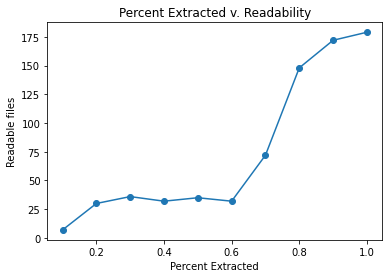

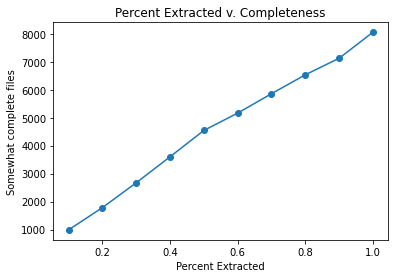

In [59]:
X = []
Y_readability = []
Y_completeness = []

readability_total = dict()
completeness_total = dict()

average_readability = []
average_completeness = []

for subdir, dirs, files in os.walk("Experiments/"):
	for file in sorted(files):
		filepath = os.path.join(subdir, file)
		threshold = re.search("dequeue_list_threshold_(.*).json", file).group(1)
		print("Threshold: ", threshold)
		X.append(float(threshold))
		with open(filepath, "r") as fp:
			dequeue_list = json.load(fp)
		readability_scores, completeness_scores = get_metadata_metrics(dequeue_list, file_to_index_dict)

		readable_count = 0
		readable = []
		for key, value in readability_scores.items():
			if value != 'no strings':
				readable_count += 1
				readable.append(value)

		#plt.boxplot(readable)
		#plt.show()
		Y_readability.append(float(readable_count))
		readability_total[threshold] = readable

		#print(len(readable))
		avg_readability = sum(readable) / len(readable)
		print("Readability: ", avg_readability)
		average_readability.append(avg_readability)

		complete = 0
		complete_valid = []

		for key, value in completeness_scores.items():
			if value > 0:
				complete += 1
				complete_valid.append(value)
		
		#plt.boxplot(complete_valid)
		#plt.show()
		Y_completeness.append(float(complete))
		completeness_total[threshold] = complete_valid

		#print(len(complete_valid))
		avg_completeness = sum(complete_valid) / len(complete_valid)
		print("Completeness", avg_completeness)
		average_completeness.append(avg_completeness)

X = np.asarray(X)
Y_readability = np.asarray(Y_readability)
Y_completeness = np.asarray(Y_completeness)

plt.title("Percent Extracted v. Readability")
plt.xlabel("Percent Extracted")
plt.ylabel("Readable files")
plt.scatter(X, Y_readability)
plt.plot(X, Y_readability)
plt.show()

plt.title("Percent Extracted v. Completeness")
plt.xlabel("Percent Extracted")
plt.ylabel("Somewhat complete files")
plt.scatter(X, Y_completeness)
plt.plot(X, Y_completeness)
plt.show()





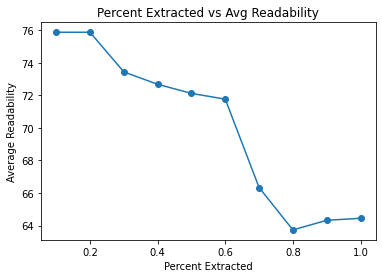

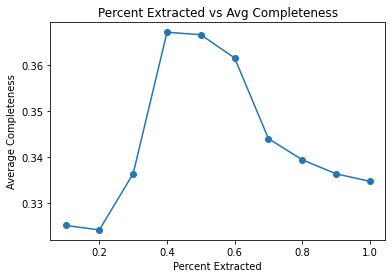

In [60]:
plt.scatter(X, average_readability)
plt.plot(X, average_readability)
plt.xlabel("Percent Extracted")
plt.ylabel("Average Readability")
plt.title("Percent Extracted vs Avg Readability")
plt.show()

plt.scatter(X, average_completeness)
plt.plot(X, average_completeness)
plt.xlabel("Percent Extracted")
plt.ylabel("Average Completeness")
plt.title("Percent Extracted vs Avg Completeness")
plt.show()

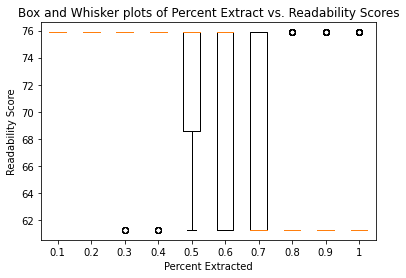

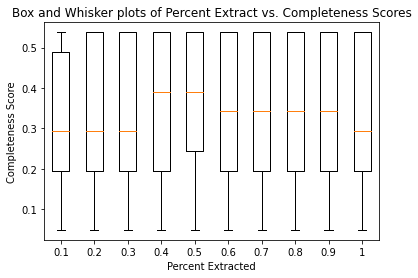

In [61]:
labels, data = [*zip(*readability_total.items())]  # 'transpose' items to parallel key, value lists
#for d in data:
	#print(d)
plt.boxplot(data, meanline=True)
plt.xticks(range(1, len(labels) + 1), labels)

plt.title("Box and Whisker plots of Percent Extract vs. Readability Scores")
plt.xlabel("Percent Extracted")
plt.ylabel("Readability Score")
plt.show()

labels, data = [*zip(*completeness_total.items())]  # 'transpose' items to parallel key, value lists
plt.boxplot(data)
plt.xticks(range(1, len(labels) + 1), labels)
plt.xlabel("Percent Extracted")
plt.ylabel("Completeness Score")
plt.title("Box and Whisker plots of Percent Extract vs. Completeness Scores")
plt.show()

